# Ekstraksi Kata Kunci

In [34]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data = pd.read_csv("/content/drive/MyDrive/ppw/beritajatim.csv")
data

,Judul,Isi,Kategori
0,Timnas Indonesia Bakal Turunkan Amar Rayhan La...,Surabaya (beritajatim.com) –Timnas Indonesia U...,Sport
1,Tim PKM UB Malang Kenalkan Metode Penanaman Ve...,Malang (beritajatim.com)– Tim Program Kreativi...,Pendidikan
2,"Prabowo: Seribu Teman Terlalu Sedikit, Satu Mu...",Surabaya (beritajatim.com) –Calon Presiden Koa...,Politik
3,96 Persen Warga Nganjuk Terlindungi Jaminan Ke...,Nganjuk (beritajatim.com) –Pemerintah Kabupate...,Pendidikan
4,Ratusan Guru Ngaji di Ring Satu Petrokimia Gre...,Gresik (beritajatim.com) –Ratusan guru mengaji...,Pendidikan
5,PT SBI Tuban Beri Sosialisasi Bahaya Area Tamb...,Bagikan ini,Pendidikan
6,Fakhri Husaini Imbau Tak Kritik Berlebihan Tim...,Surabaya (beritajatim.com)– Performa Timnas In...,Sport
7,Tim Spektronics ITS Surabaya Juara Dua Chem E-...,Surabaya (beritajatim.com) –Tim Spektronics IT...,Pendidikan
8,"Peserta SKD CASN Kota Malang Gagal Login, Ini ...",Malang (beritajatim.com)– Ujian Seleksi Kompet...,Politik
9,Indonesia Ingin Cetak Sejarah Lewat Piala Duni...,Surabaya (beritajatim.com)– Indonesia ingin ca...,Sport


In [37]:
data1=data.head(1)
data1

,Judul,Isi,Kategori
0,Timnas Indonesia Bakal Turunkan Amar Rayhan La...,Surabaya (beritajatim.com) –Timnas Indonesia U...,Sport


## Preprocessing



re.sub ['^a-zA-Z\s'] ini akan menghapus semua karakter non-abjad (tidak termasuk spasi) dari teks masukan.

In [38]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = data1['Isi'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)

*   Dilakukan proses tokenisasi setiap kalimat.
*   Hasil tokenisasi dilakukan penghapusan kata yang tidak penting



In [39]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Isi'].apply(remove_stopwords)
df=pd.DataFrame(stopword)
df

,Isi
0,surabaya beritajatim com timnas indonesia u me...


## Term Frequency

Data yang telah dilakukan preprocssing akan masuk ke dalam proses term frequency, dimana setiap kata dihitung jumlah kemunculannya didalam dokumen

In [40]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Isi']).T * vectorizer.fit_transform(df['Isi'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,amar,baca,bagikan,berharap,beritajatim,berlatih,besok,biaa,bima,blesteran,...,supprt,surabaya,tim,timeline,timnas,tomo,trainning,tujuannya,tutunya,way
amar,9,3,3,6,3,6,3,3,12,3,...,3,6,6,3,9,3,3,3,3,3
baca,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
bagikan,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
berharap,6,2,2,4,2,4,2,2,8,2,...,2,4,4,2,6,2,2,2,2,2
beritajatim,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tomo,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
trainning,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
tujuannya,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1
tutunya,3,1,1,2,1,2,1,1,4,1,...,1,2,2,1,3,1,1,1,1,1


Pembentukan Graph : Setiap kata yang memiliki hubungan dengan kata lain dan nilai Term frequency lebih dari 16 akan dibentuk node yang saling terhubung

In [41]:
G = nx.DiGraph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 16 and idx != col:
            G.add_edge(idx, col, weight=weight)

## Pagerank
**PageRank** adalah algoritma yang digunakan oleh mesin pencari, terutama oleh Google, untuk menilai dan memberikan peringkat pada halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamakan setelah nama Larry Page. PageRank mengukur otoritas atau kepentingan suatu halaman web berdasarkan seberapa banyak halaman lain yang mengaitkan ke halaman tersebut dan seberapa pentingnya halaman-halaman yang memberikan tautan tersebut.

Dalam kasus kali ini PageRank mengukur otoritas atau kepentingan suatu kata berdasarkan seberapa banyak kata lain yang mengaitkan ke kata tersebut dan seberapa pentingnya kata-kata yang memberikan tautan tersebut.

### **Algoritma Pagerank**


1.   Identifikasi kata-kata yang akan dievaluasi.
2.   Buat graph antar kata dengan tautan antar kata.
3.   Inisialisasi pagerank, Setiap halaman web diberikan nilai awal PageRank yang sama.
4.   Kemudian lakukan iterasi perhitungan pagerank.

**Rumus Pagerank :**

$\text{PR(A)}=\frac{d}{N} + \left( 1 - d\right)\left( \sum_{}^{} \frac{\text{Rank(i)}}{Outlink(i)} \right)$



*   PR(i) adalah PageRank dari kata A
*   d adalah faktor damping (biasanya 0.85 untuk Google PageRank)
*   N adalah jumlah total kata


### **Contoh manual Pagerank**
https://docs.google.com/spreadsheets/d/1UxEkKb5cPNq9R_L12mesVVVeWueRxBxd/edit?usp=sharing&ouid=104180635781972900428&rtpof=true&sd=true

Berikut adalah gambar graph yang dihasilkan dari hubungan antar kata yang memiliki nilai TF lebih dari 16

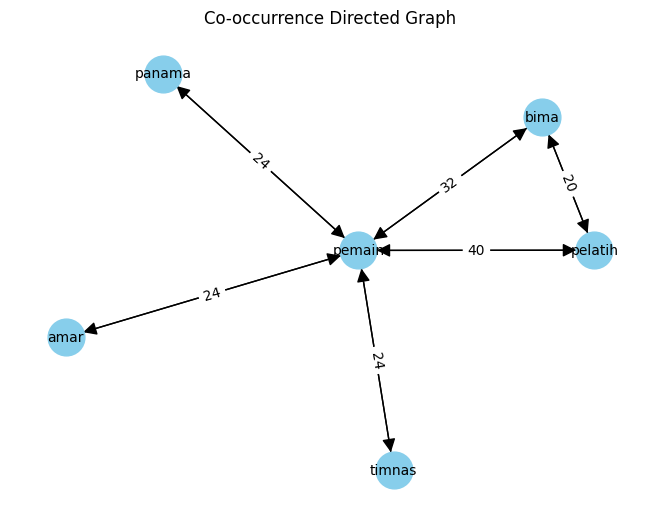

In [42]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

In [43]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:6]
sorted_d

[('pemain', 0.41917109326147867),
 ('pelatih', 0.17416034872049396),
 ('bima', 0.15352190195049228),
 ('amar', 0.08438221868917835),
 ('panama', 0.08438221868917835),
 ('timnas', 0.08438221868917835)]